# Trading strategy check
## Technique: dual moving average crossover to determine when buy or sell stock
### Simple trading strategy around traders is a signal for Buy/Sell when 30 day Moving Average(MA) crosses 100 day MA
Before start, you should have quandl module installed.
The world’s most powerful data lives on Quandl
The premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks.



In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import quandl
quandl.ApiConfig.api_key = 'jatYwap7ydsRshAyVh-q'
plt.style.use('fivethirtyeight')

In [2]:
pd.core.common.is_list_like=pd.api.types.is_list_like

In [3]:
df=data.get_data_yahoo('AAPL','2014-07-10','2020-07-18')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-07-09,95.949997,94.760002,95.440002,95.389999,36436000.0,86.240677
2014-07-10,95.550003,93.519997,93.760002,95.040001,39686000.0,85.924271
2014-07-11,95.889999,94.860001,95.360001,95.220001,34018000.0,86.086998
2014-07-14,96.889999,95.650002,95.860001,96.449997,42810000.0,87.199005
2014-07-15,96.849998,95.029999,96.800003,95.320000,45477900.0,86.177406
...,...,...,...,...,...,...
2020-07-13,399.820007,381.029999,389.059998,381.910004,47912300.0,381.222656
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300.0,387.531281
2020-07-15,396.989990,385.959991,395.959991,390.899994,38299500.0,390.196472


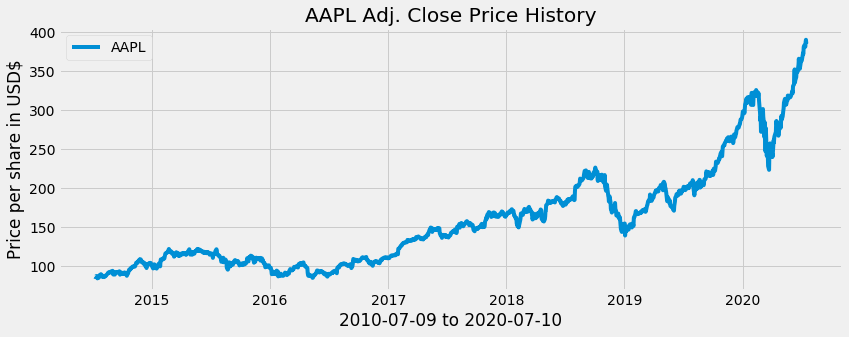

In [4]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'],label="AAPL")
plt.title("AAPL Adj. Close Price History")
plt.xlabel("2010-07-09 to 2020-07-10")
plt.ylabel("Price per share in USD$")
plt.legend(loc="upper left")

In [12]:
#Creating SMA30
SMA30=pd.DataFrame()
SMA30['Adj Close Price']=df["Adj Close"].rolling(window=30).mean()
SMA30

,Adj Close Price
Date,
2014-07-09,NaN
2014-07-10,NaN
2014-07-11,NaN
2014-07-14,NaN
2014-07-15,NaN
...,...
2020-07-13,353.112331
2020-07-14,355.321015
2020-07-15,357.568963


In [13]:
#Creating SMA100
SMA100=pd.DataFrame()
SMA100['Adj Close Price']=df["Adj Close"].rolling(window=100).mean()
SMA100

,Adj Close Price
Date,
2014-07-09,NaN
2014-07-10,NaN
2014-07-11,NaN
2014-07-14,NaN
2014-07-15,NaN
...,...
2020-07-13,302.700274
2020-07-14,303.386983
2020-07-15,304.172518


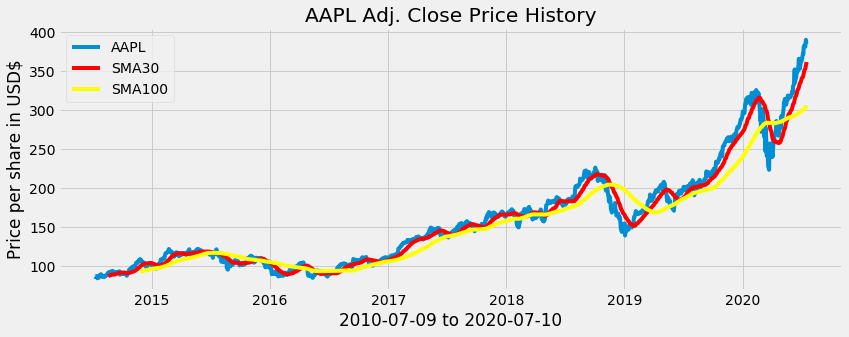

In [21]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'],label="AAPL")
plt.title("AAPL Adj. Close Price History")
plt.xlabel("2010-07-09 to 2020-07-10")
plt.ylabel("Price per share in USD$")


plt.plot(SMA30['Adj Close Price'],label='SMA30',color='red')
plt.plot(SMA100['Adj Close Price'],label='SMA100',color='yellow')
plt.legend(loc="upper left")

In [15]:
data=pd.DataFrame()
data["AAPL"]=df['Adj Close']
data["SMA30"]=SMA30["Adj Close Price"]
data["SMA100"]=SMA100["Adj Close Price"]
data.head()

,AAPL,SMA30,SMA100
Date,,,
2014-07-09,86.240677,NaN,NaN
2014-07-10,85.924271,NaN,NaN
2014-07-11,86.086998,NaN,NaN
2014-07-14,87.199005,NaN,NaN
2014-07-15,86.177406,NaN,NaN


In [16]:
#Creating function signal Buy/Sell
def buy_sell(data):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1
    for i in range(len(data)):
        if data['SMA30'][i]>data['SMA100'][i]:
            if flag !=1:
                sigPriceBuy.append(data["AAPL"][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i]<data['SMA100'][i]:
            if flag !=0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data["AAPL"][i])
                flag=0
            else :
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy,sigPriceSell)
            
                

In [17]:
#Store buy/sell data into variable
buy_sell=buy_sell(data)
data["Buy_Sig_Price"]=buy_sell[0]
data["Sell_Sig_Price"]=buy_sell[1]

In [18]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy_Sig_Price,Sell_Sig_Price
Date,,,,,
2014-07-09,86.240677,NaN,NaN,NaN,NaN
2014-07-10,85.924271,NaN,NaN,NaN,NaN
2014-07-11,86.086998,NaN,NaN,NaN,NaN
2014-07-14,87.199005,NaN,NaN,NaN,NaN
2014-07-15,86.177406,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-13,381.222656,353.112331,302.700274,NaN,NaN
2020-07-14,387.531281,355.321015,303.386983,NaN,NaN
2020-07-15,390.196472,357.568963,304.172518,NaN,NaN


Text(0, 0.5, 'AAPL share price per USD$')

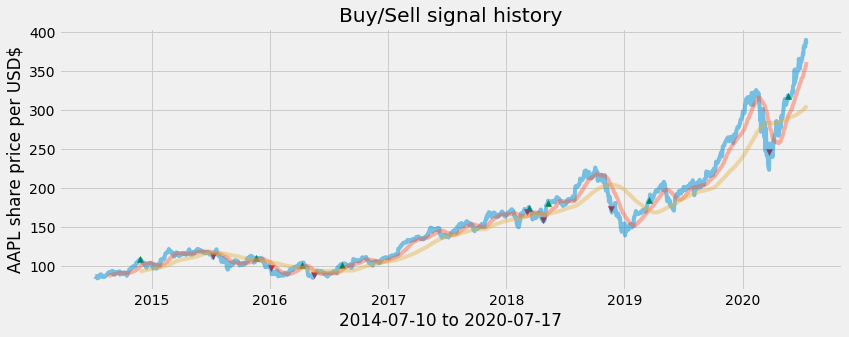

In [19]:
#Visualize buy/Sell strategy
plt.figure(figsize=(12.5,4.5))
plt.plot(data["AAPL"],label='AAPL',alpha=0.5)
plt.plot(data["SMA30"],label='SMA30',alpha=0.4)
plt.plot(data["SMA100"],label='SMA100',alpha=0.4)
plt.scatter(data.index,data['Buy_Sig_Price'],label='Buy',marker='^',color="green")
plt.scatter(data.index,data['Sell_Sig_Price'],label='Buy',marker='v',color="red")
plt.title("Buy/Sell signal history")
plt.xlabel("2014-07-10 to 2020-07-17")
plt.ylabel("AAPL share price per USD$")

## Conclusion:
Starting from 2015 it can be seen that our first signal would finish up with a little profit. Following that, there will be two unsuccesfull trades in first and second quarter. There is a huge signal starting from approximately with 100 dollars which resulted in sell of share with price of 170 dollars. 
Similar signal was in 2019 when price per share was equal to 175 dollars which resulted in profit after selling share for 250 dollars.